In [1]:
!pip3 install --upgrade --user pandas

Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.5)


In [2]:
!pip3 install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


**Проект: Выявление закономерностей определяющих успешность игр**   

**Описание Исследования**  
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
 
**Цель Исследования**    
Нужно выявить определяющие успешность игры закономерности.

**Задачи Исследования**  
Провести исследовательский анализ данных. Составить портрет пользователя каждого региона. Проверить гипотезы: 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   

**Исходные данные**  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

**Схема исследования**  

- [Шаг 1. Открыть файл с данными и изучить общую информацию](#step_1)

- [Шаг 2. Подготовка данных](#step_2)  
•	Заменить названия столбцов (привести к нижнему регистру);  
•	Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;  
•	Обработать пропуски при необходимости:  
o	Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;  
o	Описать причины, которые могли привести к пропускам;  
o	Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;  
•	Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
- [Шаг 3. Провести исследовательский анализ данных](#step_3)  
•	Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
•	Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить   распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
•	Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
•	Не учитывать в работе данные за предыдущие годы.  
•	Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.  
•	Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  
•	Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.  
•	Соотнести выводы с продажами игр на других платформах.  
•	Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  
- [Шаг 4. Составить портрет пользователя каждого региона](#step_4)  
Определить для пользователя каждого региона (NA, EU, JP):  
•	Самые популярные платформы (топ-5). Описать различия в долях продаж.   
•	Самые популярные жанры (топ-5). Пояснить разницу.  
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
- [Шаг 5. Проверить гипотезы](#step_5)  
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Пояснить:  
•	Как сформулировали нулевую и альтернативную гипотезы;  
•	Какой критерий применили для проверки гипотез и почему.  
- [Шаг 6. Написать общий вывод](#step_6)  


<a id='step_1'></a>

# Шаг 1 Открыть файл с данными и изучить общую информацию

In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from datetime import datetime

In [4]:
# Так как делал не в тренажере, то тут путь к файлу может меняться 
data_path = 'E:/Learn_yp/Sprint_7_project/Sprint_7_project/Сборный Проект №1/'

In [5]:
try:
    data = pd.read_csv(data_path + 'games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [6]:
# первый взгляд на таблицу
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# взгляд методом info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцов относительно немного, видно что они представлены типами object и float64. Видны пропуски: совсем незначительное число в Name и Genre, чуть большее в Year of release, и больше половины данных отсутствуют в Critic_score, User_score и Rating.
из таблицы сразу видно, что год и Critic_score следует перевести в int, Critic_score тоже выглядит как int (записан, как object)  
Дальше хочу применить методы describe и value_counts

In [8]:
# взгляд методом describe()
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
# метод describe для данных типа 'object'
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


при вызове метода describe количественные данные выглядят естественно - конечно надо будет еще дополнительно на них смотреть. describe для текстовых значений сразу выявляет аномальное значение tbd, о котормо говорилось в задании, причем таких значений много почти 2500 (поэтому столбец и object, а не int). Видно что для Name абсолютное большинство значений уникально. Хочу взглянуть на уникальные значения других столбцов типа object.

In [10]:
[display(data[i].value_counts()) for i in ['Platform', 'Genre', 'Rating', 'User_Score']]

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

[None, None, None, None]

Далее хочу взглянуть на диаграммы размаха количественных столбцов

Text(0.5, 1.0, 'Диаграмма размаха другие продажи')

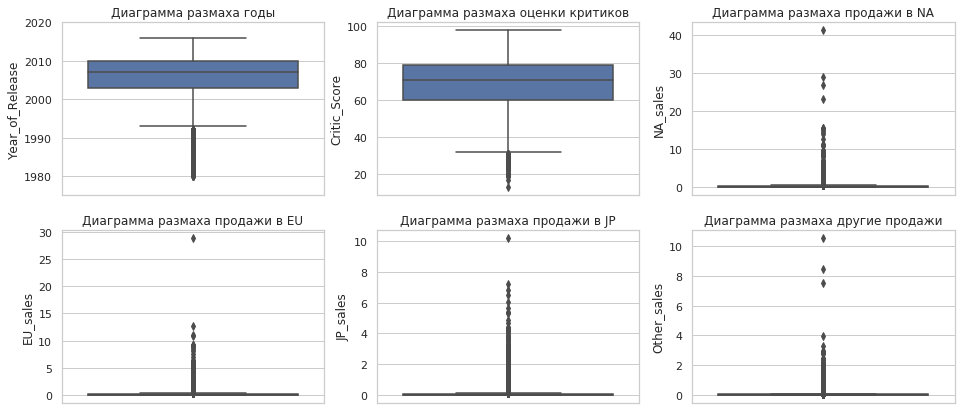

In [11]:
plt.figure(figsize=(16, 7))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)

plt.subplot(2, 3, 1)
sns.boxplot(y=data['Year_of_Release'])
plt.title('Диаграмма размаха годы')
#plt.ylim(ymin=1975, ymax = 2020)
plt.ylim(1975, 2020)

plt.subplot(2, 3, 2)
sns.boxplot(y=data['Critic_Score'])
plt.title('Диаграмма размаха оценки критиков')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['NA_sales'])
plt.title('Диаграмма размаха продажи в NA')

plt.subplot(2, 3, 4)
sns.boxplot(y=data['EU_sales'])
plt.title('Диаграмма размаха продажи в EU')

plt.subplot(2, 3, 5)
sns.boxplot(y=data['JP_sales'])
plt.title('Диаграмма размаха продажи в JP')

plt.subplot(2, 3, 6)
sns.boxplot(y=data['Other_sales'])
plt.title('Диаграмма размаха другие продажи')


Диаграммы размаха по годам и оценкам критиков выглядят естетственно, для продаж видно, что основное число значений находиться в районе нуля, но видны выбросы до достаточно больших значений - думаю посмотреть на значения продаж в графиках

Text(0.5, 1.0, 'другие продажи')

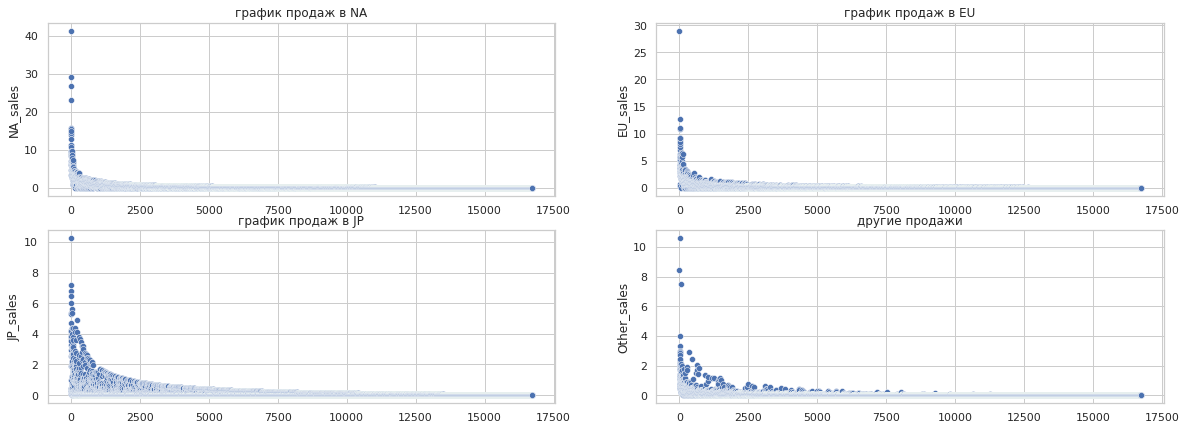

In [12]:
plt.figure(figsize=(20, 7))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)

plt.subplot(2, 2, 1)
sns.scatterplot(data = data, x=data.index, y='NA_sales')
plt.title('график продаж в NA')

plt.subplot(2, 2, 2)
sns.scatterplot(data = data, x=data.index, y='EU_sales')
plt.title('график продаж в EU')

plt.subplot(2, 2, 3)
sns.scatterplot(data = data, x=data.index, y='JP_sales')
plt.title('график продаж в JP')

plt.subplot(2, 2, 4)
sns.scatterplot(data = data, x=data.index, y='Other_sales')
plt.title('другие продажи')


Судя по диаграммам рассеяния продаж существуют "супердорогие" игры, стоимость остальных сильно меньше (хотя для Японии снижение достаточно плавное и распределение цен равномернее, чем в Европе и особенно Америке). Кроме того в Америке самые высокие цифры по продажам.

<a id='hist_1'></a>
Для категориальных столбцов (и user_score, уникальных значений в котором немного + интересует tbd) взгляну на гистограммы

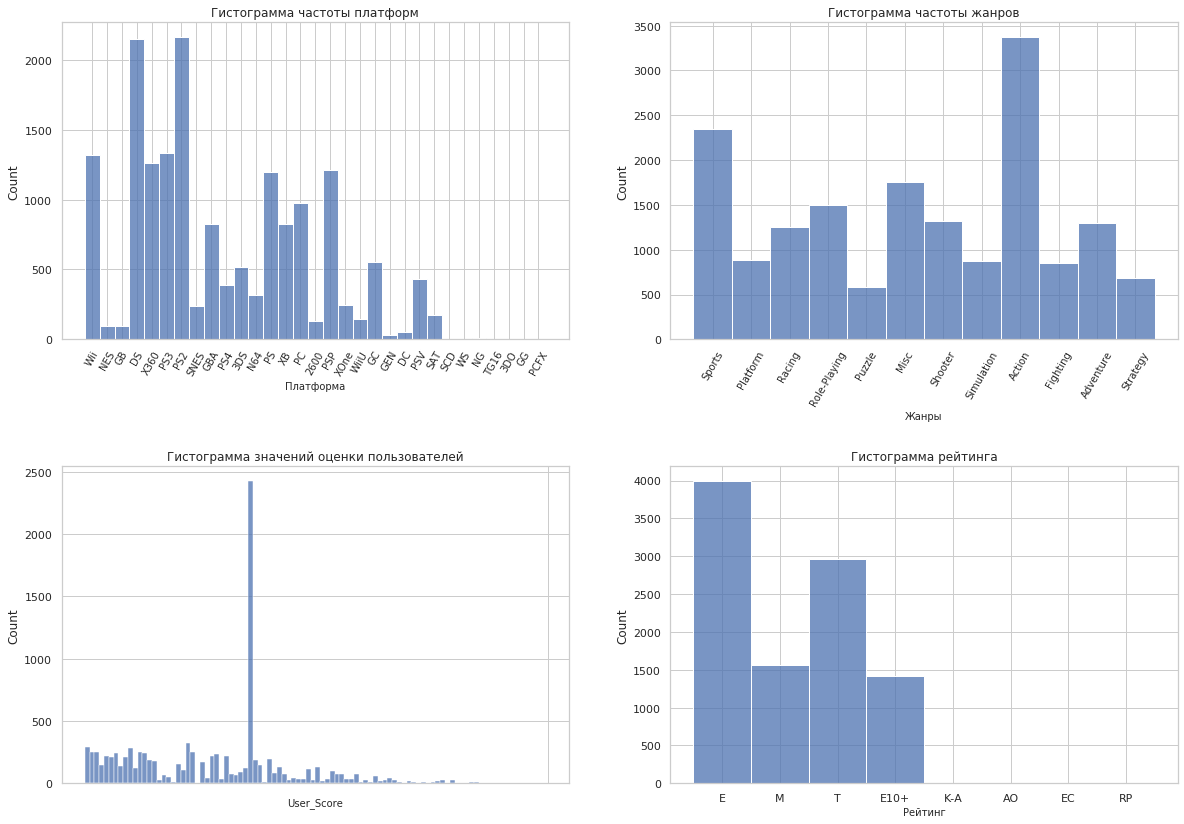

In [13]:
#plt.figure(figsize=(20, 10))
#plt.subplot(2, 2, 1)
#data['Platform'].hist(bins=31)
#plt.title('Гистограмма частоты платформ')

#plt.subplot(2, 2, 2)
#data['Genre'].hist(bins=12)
#plt.title('Гистограмма частоты жанров')

#plt.subplot(2, 2, 3)
#data['User_Score'].hist(bins=96)
#plt.title('Гистограмма значений оценки пользователей')

#plt.subplot(2, 2, 4)
#data['Rating'].hist(bins=8)
#plt.title('Гистограмма рейтинга')

plt.figure(figsize=(20, 14))       

plt.subplot(2, 2, 1)                            
ax = sns.histplot(data=data, x="Platform", bins=31)
plt.xlabel('Платформа', fontsize=10)
plt.xticks(fontsize = 10, position = (-0.03, 0), rotation = 60) # настройка подписей
plt.title('Гистограмма частоты платформ')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x="Genre", bins=12)
plt.xlabel('Жанры', fontsize=10)
plt.xticks(fontsize = 10, position = (-0.03, 0), rotation = 60)  # настройка подписей
plt.title('Гистограмма частоты жанров')
 

plt.subplot(2, 2, 3)
sns.histplot(data=data, x="User_Score", bins=96)
plt.xlabel('User_Score', fontsize=10)
plt.xticks('')                                       # настройка подписей - хотел убрать - получилось так
plt.title('Гистограмма значений оценки пользователей')

plt.subplot(2, 2, 4)
sns.histplot(data=data, x="Rating", bins=8)
plt.xlabel('Рейтинг', fontsize=10)
plt.title('Гистограмма рейтинга')

plt.subplots_adjust(hspace = 0.4) # увеличил расстояние между графиками
plt.show()

взгляд на гистограммы говорит о том же о чем значения value_counts. Жанры распределены достаточно равномерно, среди рейтингов есть 4 часто встречающихся значения и 4 очень редких. Среди платформ есть более частые, менее и очень редкие. Гистограмма для user_score выглядит скорее как гистограмма по количественным данным (ожидаемо), с одним отличающимся пиком с примерно 2500 значений (как было видно выше это и есть tbd из-за которого этот столбец принимает тип object).

посмотрю на пропуски в столбце Name

In [14]:
data[data['Name'].isna() == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


видно что пропуски в Name и Genre совпали - их всего 2 - для задач проекта не считаю это критичным - можно удалить их, можно попробовать заменить, т.к. в цифрах продаж не лишним будет учесть (планирую заменить), оба пропуска принадлежат 1993 году и платформе GEN (редкая - 29 значений), т.к. имена обычно уникальные можно смело писать unknown_game_1 или что-то такое. Насчет жанра придется делать предположение - для этого можно взглянуть на весь список GEN и то какие жанры для этой платформы характерны.

In [15]:
display(data.query('Platform == "GEN"').sort_values(by=['Year_of_Release', 'Genre']))
display(data.query('Platform == "GEN"')['Genre'].value_counts())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
9787,Ecco the Dolphin,GEN,1992.0,Adventure,0.00,0.00,0.12,0.00,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
9563,Gunstar Heroes,GEN,1992.0,Shooter,0.00,0.00,0.13,0.00,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN


Platform        7
Fighting        5
Action          3
Sports          3
Role-Playing    3
Adventure       2
Racing          1
Strategy        1
Shooter         1
Misc            1
Name: Genre, dtype: int64

мне кажется полезным посмотреть на диаграммы рассеяния зависимости категориальных столбцов от года выпуска игр

Text(0.5, 1.0, 'распределение рейтингов в зависимости от лет')

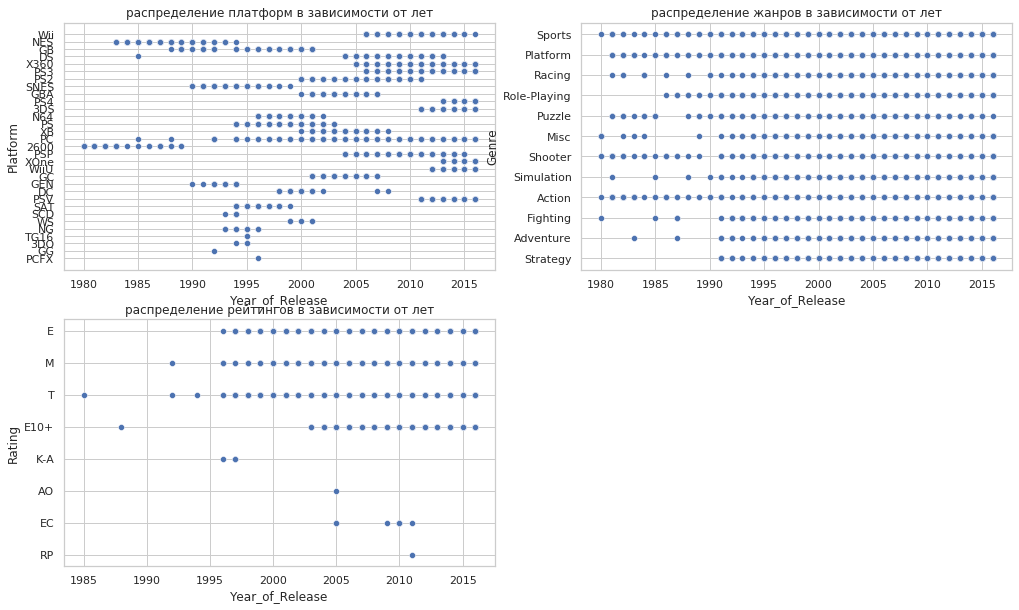

In [16]:
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data = data, x='Year_of_Release', y='Platform')
plt.title('распределение платформ в зависимости от лет')

plt.subplot(2, 2, 2)
sns.scatterplot(data = data, x='Year_of_Release', y='Genre')
plt.title('распределение жанров в зависимости от лет')

plt.subplot(2, 2, 3)
sns.scatterplot(data = data, x='Year_of_Release', y='Rating')
plt.title('распределение рейтингов в зависимости от лет')

Из графиков вижу, что жанры в последнее время представлены все - в 80-ые некоторые жанры еще не появлялись или появлялись редко. Из графика с рейтнгом видно, что стабильное появление рейтинга у игр началось с 1996 года. Также видно, что редкие рейтинги (RP, EC, AO, K-A) появлялись лоально во времени, а потом исчезали.  
Интересным мне показался график платформ - на нем проглядывается, то что разные платформы существовали(существуют) в определенные периоды времени (и большинство на момент выгрузки таблицы уже не существуют)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

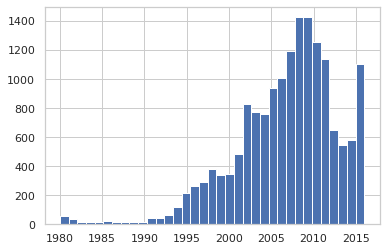

In [17]:
# взгляд на то сколько игр появлялось по годам
data['Year_of_Release'].hist(bins=35)
data['Year_of_Release'].value_counts()

видно что до 2009 года число игр с каждым годом росло, потом наблюдалось некоторое снижение, в 2015 опять рост

In [18]:
# для завершения общего знакомства с данными хочу посмотреть на матрицу корреляций
data.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57e85c9f90>,
      dtype=object)

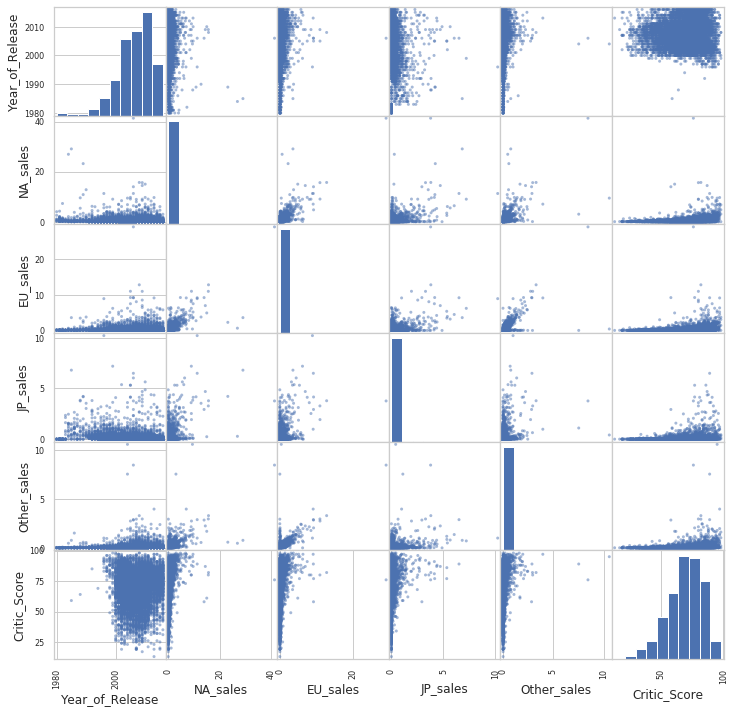

In [19]:
# и на матрицу рассеяния
pd.plotting.scatter_matrix(data, figsize=(12, 12))

корреляции видны в основном между продажами в разных регионах (и небольшие корреляции между продажами и Critic_Score)  
из матрицы рассеяния видно, что Critic_Score почти не фиксировались до конца 1990х. Также похоже, что значения Critic_Score распределены нормально с перекосом вправо. Из-за значения tbd так не получится посмотреть для User_Score. Что делать со значениями tbd пока неясно.

<a id='tbd_quest'></a>

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.0,0.0,0.0,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.0,0.0,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.0,0.0,0.0,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.0,0.0,0.0,NaN,tbd,E
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.0,0.0,0.0,NaN,tbd,T


2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

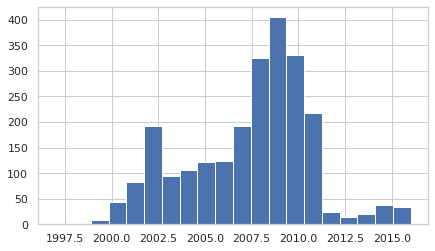

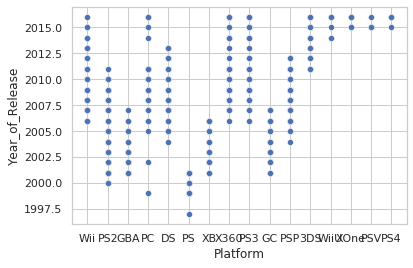

In [20]:

# пробую посмотреть особенности среза где User_Score = tbd

display(data.query('User_Score == "tbd"').head())
display(data.query('User_Score == "tbd"').tail())
display(data.query('User_Score == "tbd"')['Year_of_Release'].value_counts()) # сколько раз какое значение появлялось в какие годы

data.query('User_Score == "tbd"')['Year_of_Release'].hist(bins=20,figsize=(7, 4))

plt.show()

# соотношение годов и платформ (для среза с tbd)
sns.scatterplot(data = data.query('User_Score == "tbd"'), y=data.query('User_Score == "tbd"')['Year_of_Release'], x=data.query('User_Score == "tbd"')['Platform'])

In [21]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
# проверка наличия явных дубликатов
data.duplicated().sum()

0

## Вывод по шагу 1:
- Столбцов относительно немного, видно что они представлены типами object и float64.   
- есть 2 одинаковых пропуска в Name и Genre, несколько сот пропусков в Year_of_Release и много (больше половины) пропусков в Raitg, User_Score и Critic_Score
- Диаграммы размаха по годам и оценкам критиков выглядят естетственно
- Судя по диаграммам рассеяния продаж существуют "супердорогие" игры, стоимость остальных сильно меньше (хотя для Японии снижение достаточно плавное и распределение цен равномернее, чем в Европе и особенно Америке)
- Жанры распределены достаточно равномерно, среди рейтингов есть 4 часто встречающихся значения и 4 очень редких. Среди платформ есть более частые, менее и очень редкие.
- в последнее время представлены все жанры - в 80-ые некоторые жанры еще не появлялись или появлялись редко. Из графика с рейтнгом видно, что стабильное появление рейтинга у игр началось с 1996 года. Также видно, что редкие рейтинги (RP, EC, AO, K-A) появлялись лоально во времени, а потом исчезали.
- на графике распределения палтформ по годам проглядывается, то что разные платформы существовали(существуют) в определенные периоды времени (и большинство на момент выгрузки таблицы уже не существуют)
- явных дубликатов нет
- что делать со значением tbd в User_Score пока неясно

<a id='step_2'></a>
# Шаг 2. Подготовка данных

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:  
Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;  
Описать причины, которые могли привести к пропускам;  
Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

## Замена названий столбцов

In [23]:
# приведу названия к нижнему регистру методом str.lower()
data.columns = data.columns.str.lower()

In [24]:
# проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему

In [25]:
# год явно не должен быть во float, думал перевести в int, но вообще это дата - возможно корректнее в datetime

In [26]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [27]:
data['year_of_release'] = data['year_of_release'].dt.year

In [28]:
# проверка
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


здесь я делаю какую-то ошибку или происходит что-то неожиданное, видимо попытка перевода в datetime не имела смысла (посмотрел в один из предыдущих проектов с недвижмостью Петербурга - там я округлял дату до года и она сразу переходил в int - здесь во float, ну а действия c pd.to_datetime были лишними, но пока оставлю их, чтобы ход мысли был виден 

year_of_release переведу в int с помощью astype, но сначала надо решить, что делать с пропусками - в данном случае думаю 
попробовать применить метод transform c учетом платформы (мне кажется что платформа самый четкий ориентир для времени - это было видно из диаграммы рассеяния платформ в зависимости от года), значения буду использовать медианные (это будет ближе к правде). Понятно, что даже такая замена может быть неточной, но думаю, что это единственное место в датасете (кроме 2-ух пропусков в name и genre) где применение замены вообще корректно.

In [29]:
#data['year_of_release'] = data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('median'))
data = data.dropna(subset=['year_of_release']) # удаление пропусков, ориентируясь на пропуски в 'year_of_release'
print('Проверка пропусков:', data['year_of_release'].isna().sum()) # проверка пропусков
display(data.info())

Проверка пропусков: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

In [30]:
# year_of_release переведу в int с помощью astype
data['year_of_release'] = data['year_of_release'].astype('int')

в этом месте периодическими включениями info() заметил, что когда datetime округляется до года и содержит пропуски, то округляется до float, а когда пропусков нет, то до int - не знаю насколько это важно, но кажется такая зависимость есть

Для critic_score не вижу возможности заменить пропуски, была видна небольшая корреляция critic_score с продажами (особенно na_sales), но думаю, что замена с опорой на продажи вызовет сильные искажения (т.к. в продажах редко, но встречаются очень большие значения)  

начал пробовать перевести в int заменив пропуски нулями, переведя в int, а потом вернув пропуски, но убедился, что это бессмысленно, т.к. значения все равно вернулись во float

user_score похож на тип float, но сначала надо будет определиться с tbd
на этапе знакомства с данными смотрел на tbd [здесь](#tbd_quest) - не могу сказать, что это что-то сильно прояснило.  
хосу посмотреть на срез где user_score = tbd в плане корреляций и метода describe

In [31]:
data.query('user_score == "tbd"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.035623,-0.055546,-0.004151,0.046920,-0.213804
na_sales,-0.035623,1.000000,0.639769,-0.019034,0.583762,0.093750
eu_sales,-0.055546,0.639769,1.000000,0.007489,0.656132,0.128992
jp_sales,-0.004151,-0.019034,0.007489,1.000000,-0.001227,0.003450
other_sales,0.046920,0.583762,0.656132,-0.001227,1.000000,0.076647
critic_score,-0.213804,0.093750,0.128992,0.003450,0.076647,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57e3281610>,
      dtype=object)

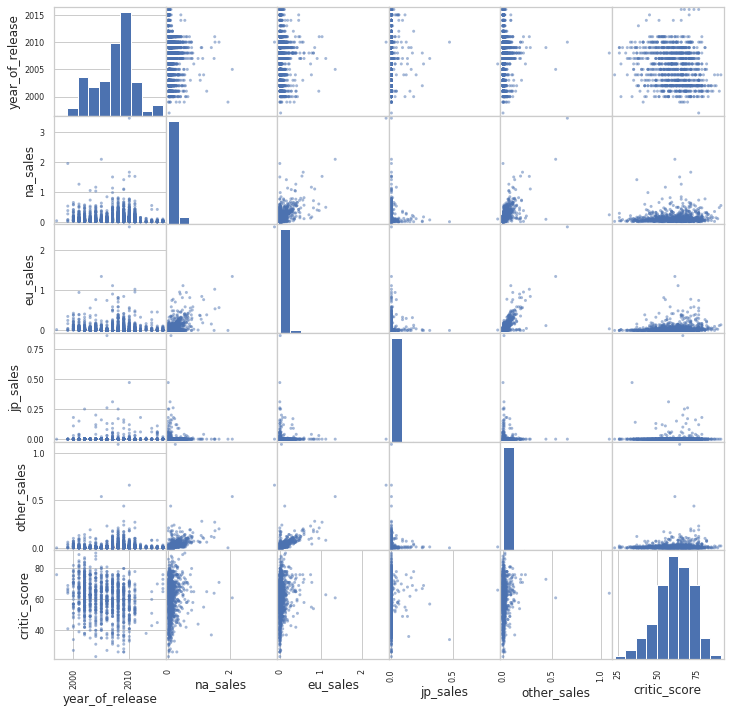

In [32]:
pd.plotting.scatter_matrix(data.query('user_score == "tbd"'), figsize=(12, 12))

In [33]:
data.query('user_score == "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,1056.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,60.766098
std,3.484229,0.176593,0.112068,0.026395,0.039411,11.190603
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


In [34]:
data.query('user_score == "tbd"').describe(include=['object'])

,name,platform,genre,user_score,rating
count,2376,2376,2376,2376,2326
unique,1903,16,12,1,5
top,Wipeout 2,DS,Misc,tbd,E
freq,5,744,440,2376,1548


Вижу несколько особенностей среза с tbd:
- данные идут с 1997 года
- есть небольшая отрицательная корреляция года и значений critic_score для среза с tbd
- примерно для 60% среза значения рейтинга = E (для всего датасета около 25%)
- максимальные цифры продаж заметно меньше, чем для всегоо датасета (во много раз)  

у меня так и не получилось ясно понять, что делать с этим значением (возможно дело в том, что я совсем не в теме индустрии игр, возможно эффект был бы если обратится к поисковикам (в реальной ситуации я бы так сразу сделал), но т.к. проект учебный мне кажется правильным попытаться сделать вывод без обращения к поисковикам.
В значениях рейтинга может быть какая-то наводящая информация, но неясно пока как её извлечь  

Мне кажется более верным исходить из того, что максимальные цифры продаж для этого среза невелики, по факту информация о tbd ничего не даёт кроме того, что информации нет, а в целом с user_score будет удобнее и информативнее работать в типе float (int не получится из-за пропусков). Поэтому (с учетом того, что в других столбцах тоже немало пропусков) думаю, что значения с tbd надо удалить - сделать пропуски на их месте.

In [35]:
# data.loc[data['user_score']== 'tbd', 'user_score'] = None # сделал такую заготовку потом понял, что в pd.to_numeric 
# некорректные значения можно сделать сразу пропусками

In [36]:
# перевод user_score во float, tbd - станет пропусками
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [37]:
# проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Большая часть описаний, требуемых в задании сделана по ходу, еще требовалось - "описать причины, которые могли привести к пропускам". Думаю, что здесь (как и часто) это объединение различных датасетов. Как видно из графиков значения рейтинга и оценок (где большинство пропусков) впервые появляются в 1985, но реально становятся массовыми с конца 90х. 2 пропуска для платформы GEN, как и для года, вероятно объясняются просто сбоем в записи.

In [39]:
# обработаю пропуски в name и genre
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [40]:
# еще раз посмотрю на данные
display(data.query('platform == "GEN"').sort_values(by=['year_of_release', 'genre']))
display(data.query('platform == "GEN"')['genre'].value_counts())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
588,Streets of Rage,GEN,1990,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
9787,Ecco the Dolphin,GEN,1992,Adventure,0.00,0.00,0.12,0.00,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
145,Sonic the Hedgehog 2,GEN,1992,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
9563,Gunstar Heroes,GEN,1992,Shooter,0.00,0.00,0.13,0.00,NaN,NaN,NaN
832,NBA Jam,GEN,1992,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN


Platform        7
Fighting        5
Action          3
Sports          3
Role-Playing    3
Adventure       2
Racing          1
Strategy        1
Shooter         1
Misc            1
Name: genre, dtype: int64

In [41]:
# думаю обе игры можно как-то назвать и присвоить им самый часто встречающийся для GEN жанр - Platform
data.loc[659, 'name'] = 'unknown_game_GEN_1993_1'
data.loc[14244, 'name'] = 'unknown_game_GEN_1993_2'
data.loc[659, 'genre'] = 'Platform'
data.loc[14244, 'genre'] = 'Platform'

## Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

In [42]:
# я понял задание так - сделал столбец с суммарными продажами
data['sales'] = data.loc[:, 'na_sales':'other_sales'].sum(axis=1)

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Вывод по шагу 2
- названия столбцов приведены к нижнему регистру
- year_of_release приведен к типу int, user_score к типу float. Перевести в int другие столбцы, которые можно было перевести во float не удалось, т.к. там остались пропуски.
- пропуски в year_of_release заполнены базируясь на данных о платформах, пропуски в name и genre глядя на данные платформы GEN 
- причины появления пропусков это объединение различных датасетов. Как видно из графиков значения рейтинга и оценок (где большинство пропусков) впервые появляются в 1985, но реально становятся массовыми с конца 90х. 2 пропуска для платформы GEN, как и для года, вероятно объясняются просто сбоем в записи.
- не увидел возможности что-то сделать со значение tbd в user_score и удалил его (эти ячейки стали пропускам)
- суммарные продажи во всех регионах подсчитаны

<a id='step_3'></a>

# Шаг 3 Исследовательский анализ данных

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить   распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
- Не учитывать в работе данные за предыдущие годы.  
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.  
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.  
- Соотнести выводы с продажами игр на других платформах.  
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

## Cколько игр выпускалось в разные годы. Важны ли данные за все периоды

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

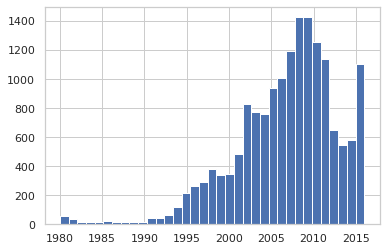

In [44]:
# взгляд на то сколько игр появлялось по годам (как в шаге один)
data['year_of_release'].hist(bins=35)
display(data['year_of_release'].value_counts())

In [45]:
# хочу представить данные на графике для удобства 
df = data.groupby('year_of_release')['name'].count().sort_values(ascending=False) # для временных задач буду создавать датасет df

In [46]:
df = df.reset_index(level='year_of_release') # перевод индекса в столбец после группировки

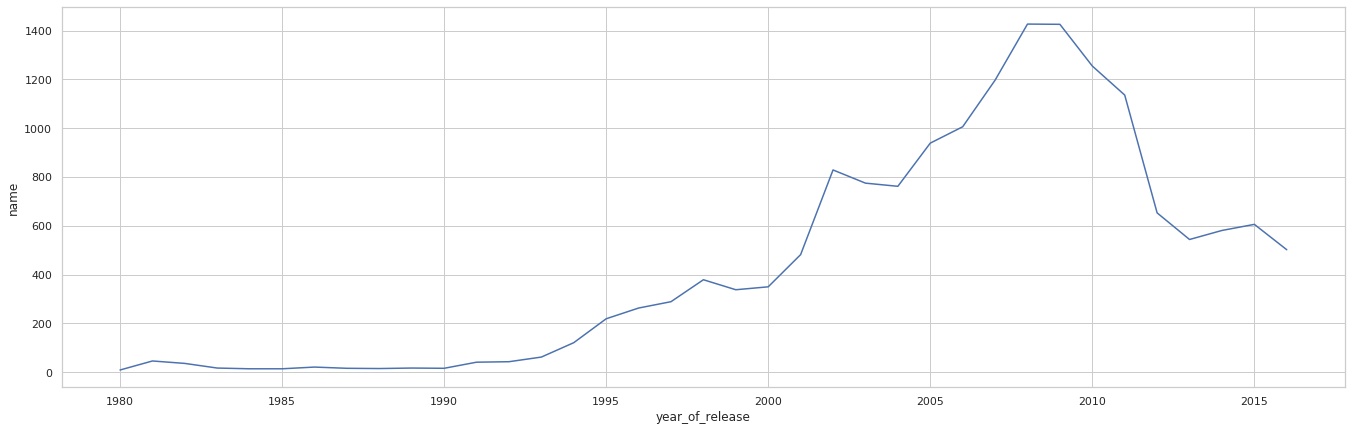

In [47]:
# строю график
plt.figure(figsize=(23, 7))
sns.lineplot(data = df, x='year_of_release', y='name')

До 1994-1996 годов игр был мало и и ндустрия была малоразвитой (это было видно и по пропускам в user_score, critic_score и rating - там данные начинались с 1985 года, но массово они встречаются с конца 90х). Какой именно год (1994, 1995 или 1996) выбрать нижней границей важного периода не совем ясно - я хочу выбрать **1994** (т.к. там начинается заметный рост, хотя повсеместное поялвение рейтинга идет с 1996)

## Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам

In [48]:
# для временныx операций буду схоранять таблицу в переменную df
# группировка данных по суммарным продажам по платформам (хотя я выделил 1994 
# как начало данных, которые здесь нужны, по возможности, и, если это не мешает, буду использовать все данные)
df = data.groupby('platform')['sales'].sum().sort_values(ascending=False)

In [49]:
df = df.reset_index(level='platform') # перевод индекса в столбец после группировки

In [50]:
display(df)

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


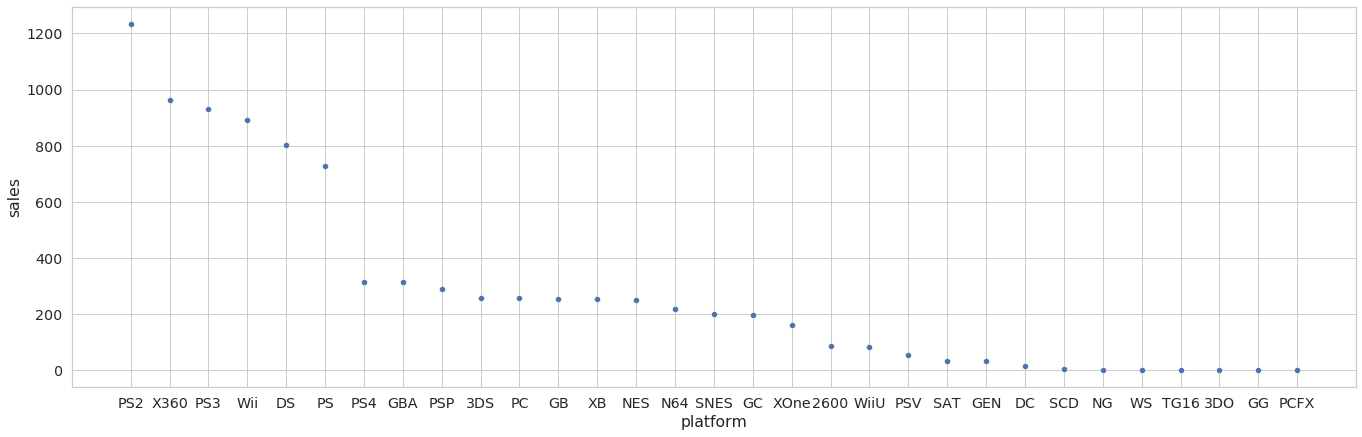

In [51]:
# строю график
plt.figure(figsize=(23, 7))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1.3)
sns.scatterplot(data = df, x='platform', y='sales')

виден резкий отрыв в суммарных продажах группы из 6 платформ: "PS2", "X360", "PS3", "Wii", "DS", "PS"

,platform,year_of_release,sales
25,DS,1985,0.02
26,DS,2004,17.27
27,DS,2005,130.14
28,DS,2006,119.81
29,DS,2007,146.94
...,...,...,...
220,X360,2012,99.74
221,X360,2013,88.58
222,X360,2014,34.74
223,X360,2015,11.96


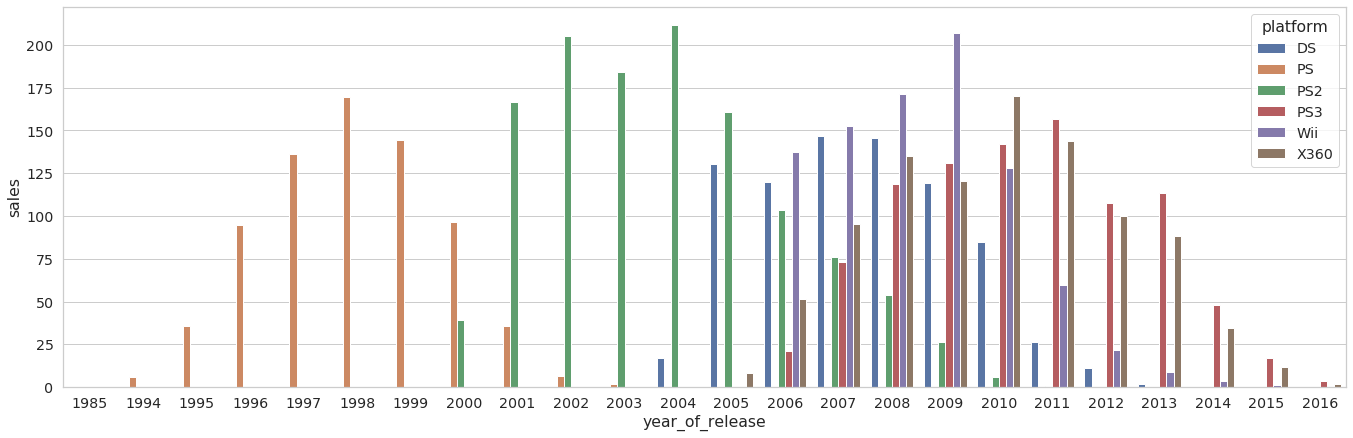

In [52]:
# смотрю на динамику продаж 6 самых продаваемых платформ по годам

df = data.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'}) 
df = df.reset_index(level=['platform', 'year_of_release'])
df = df.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')

display(df)

plt.figure(figsize=(23, 7))
sns.barplot(x = 'year_of_release', y = 'sales', ci = None, hue='platform', data = df)

видно что динамика продаж для платформ идет в виде "волн", причем эти волны перекрываются (затухает одна - растет другая), "волна" (время от появления до исчезновения продаж на платформе) длится 9-11 лет.   
заметно, что с 2006 года лидирующих платформ стало больше и их "волны" болше накладываются друг на друга.  
также заметно, что 2006-2016 волны PS3 и X360 шли сходно  

интересно, что заметен общий спад в 2011-2016 годах: помню, что данных по 2016 недостаточно, но это не определяет спад в другие годы, вижу два фактора: 
- 1. общее число игр с 2011 резко падает (как было видно выше и просто падает с 2009) 
- 2. появилась какая-то новая платформа, ппродажи, которой должны нарастать, и которая не вошла в 6 самых прибыльных

думаю, что надо дополнительно посмотреть на платформы с учетом времени их появления

In [53]:
df = data.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'}) 
df = df.reset_index(level=['platform', 'year_of_release'])
df.sort_values(by=['year_of_release', 'sales'], ascending=False)
df = df.query('year_of_release in (2012, 2013, 2014, 2015, 2016)') # срез по 5 годам

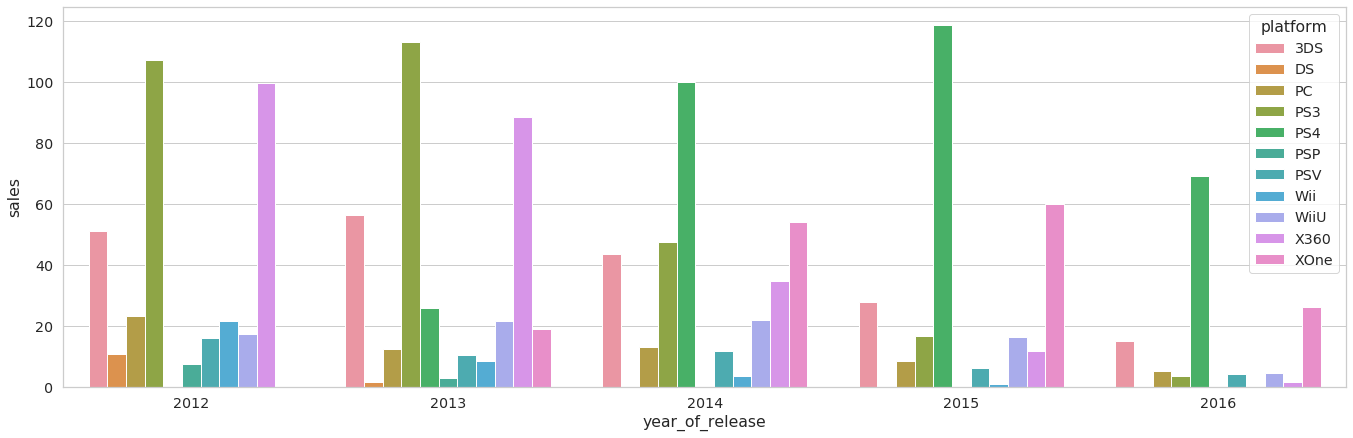

In [54]:
#график по всем платформам для последних 5 лет датасета
plt.figure(figsize=(23, 7))
sns.barplot(x = 'year_of_release', y = 'sales', ci = None, hue='platform', data = df)

теперь видно, что нарастают продажи PS4 и XOne (спад в 2016 может быть свяан с тем что данные не по всему году - а может и нет) (есть и другие интересные показатели 3DS, WiiU, но они не определяют картину), а PS4 и XOne видимо начало новой волны на смену PS3 и X360 

посмотрю график выше с добавлением этих двух платформ (просто PS уберу, чтобы не мешала обзору)

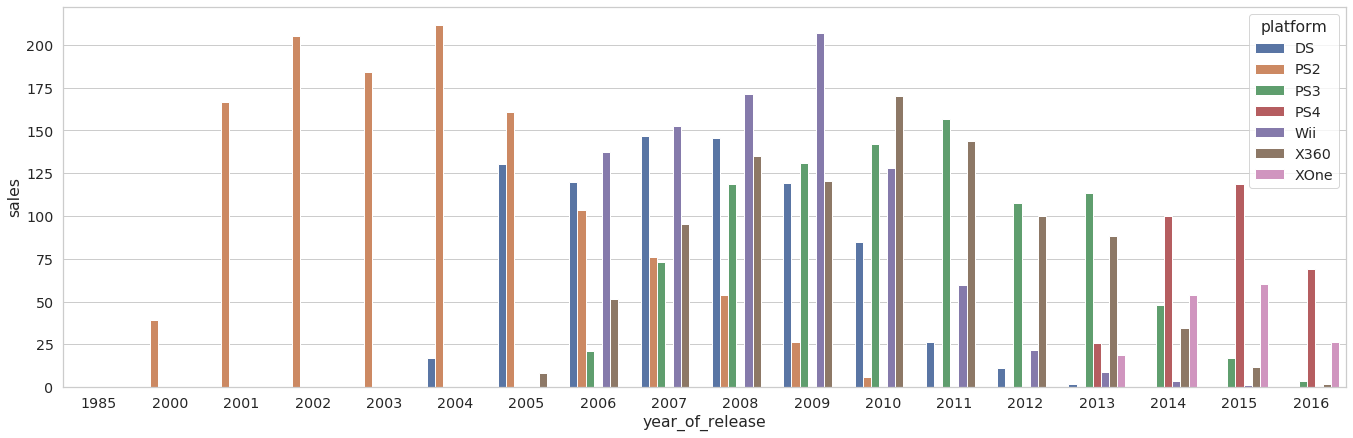

In [55]:
df = data.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'}) 
df = df.reset_index(level=['platform', 'year_of_release'])
df = df.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS4", "XOne")')

plt.figure(figsize=(23, 7))
sns.barplot(x = 'year_of_release', y = 'sales', ci = None, hue='platform', data = df)

теперь все выглядит логичнее - видна новая волна платформ, еще могу предположить, что спад после 2009-2011 года может обусловлен исчензовением роли конкурентов PS и X - DS, Wii. Еще (это я когда-то слышал, а сейчас вспомнил) большую роль может иметь уровень развития смартфонов (что становится фактором некоторого спада в платформах). 

##### Далее отвечу на вопросы задания, на которые еще не ответил или ответил не полностью:

- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
**исходя из замечания понял, что "актуальный период" это 2015-2016 год - по нему буду вести расчеты в следующих пунктах. При этом обращая внимание на "волна популярности платформ" - волну от подъема до спада лидирующей(или лидирующих) платформ. У меня получалось, что волна это 9-11 лет (с учетом того что периоды для PS3 и X360 11 лет - буду воспринимать эту цифру Пик наступает на 5-6 год - т.е. 2017 год должен быть началом пика периода**

- Не учитывать в работе данные за предыдущие годы.
**я не понял что имелось в виду в этом требовании - не учитывать отдельно? или вообще (но все данные, которые есть это данные за прошлые годы) - вроде бы теперь понял**

- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
**видимо вопрос про спад одной волны и начало другойв перод 2013-2016 виден последовательный спад: PS3, Wii, X360 и рост: PS4 и XOne **

**про прогноз**
еще в задании говорится про "прогноз на 2017" - я не очень понял задание (особенно момент про не использовать данные за прошлые годы), но решил попробовать спрогнозировать продажи XOne и PS4 в 2017 (данные за 2016 при этом использовать не буду, но без данных за 2015 не знаю как это сделать). 

Как написал выше 2017 это 5 год "волны" (или актуального периода) - поэтому считаю возможным посмотреть соотношение между показателями 5-го и 4-го, и 4-го и 3-ьего года для платформы того же производителя в предыдущую волну. И потом вывести 2017 исходя из 2015 (но не 2016 - данные неполны).

Сделать так хочу для каждой из двух плафторм по отдельности (у X360 период начинался на год раньше).

(возможно весь подход некорректен - но решл попробовать)

In [56]:
# смотрю значения в интересующие годы
print('PS3 в 2010:', df.query('platform == "PS3" and year_of_release == 2010')['sales'])
print('PS3 в 2009:', df.query('platform == "PS3" and year_of_release == 2009')['sales'])
print('PS3 в 2008:', df.query('platform == "PS3" and year_of_release == 2008')['sales'])
print()
print('X360 в 2009:', df.query('platform == "X360" and year_of_release == 2009')['sales'])
print('X360 в 2008:', df.query('platform == "X360" and year_of_release == 2008')['sales'])
print('X360 в 2007:', df.query('platform == "X360" and year_of_release == 2007')['sales'])
print()
print('PS4 в 2015:', df.query('platform == "PS4" and year_of_release == 2015')['sales'])
print('XOne в 2015:', df.query('platform == "XOne" and year_of_release == 2015')['sales'])

PS3 в 2010: 146    142.17
Name: sales, dtype: float64
PS3 в 2009: 145    130.93
Name: sales, dtype: float64
PS3 в 2008: 144    118.52
Name: sales, dtype: float64

X360 в 2009: 217    120.29
Name: sales, dtype: float64
X360 в 2008: 216    135.26
Name: sales, dtype: float64
X360 в 2007: 215    95.41
Name: sales, dtype: float64

PS4 в 2015: 155    118.9
Name: sales, dtype: float64
XOne в 2015: 236    60.14
Name: sales, dtype: float64


In [57]:
# соотношение 5/4 год для PS3
k_5_to_4_ps = df.query('platform == "PS3" and year_of_release == 2010').loc[146, 'sales'] / df.query('platform == "PS3" and year_of_release == 2009').loc[145, 'sales']
# соотношение 4/3 год для PS3
k_4_to_3_ps = df.query('platform == "PS3" and year_of_release == 2009').loc[145, 'sales'] / df.query('platform == "PS3" and year_of_release == 2008').loc[144, 'sales']

ps4_2017 = df.query('platform == "PS4" and year_of_release == 2015').loc[155, 'sales'] * k_4_to_3_ps * k_5_to_4_ps
print(f'Прогноз на PS4 на 2017: {ps4_2017:.2f}')
      

# соотношение 5/4 год для X360
k_5_to_4_x = df.query('platform == "X360" and year_of_release == 2009').loc[217, 'sales'] / df.query('platform == "X360" and year_of_release == 2008').loc[216, 'sales']
# соотношение 4/3 год для X360
k_4_to_3_x = df.query('platform == "X360" and year_of_release == 2008').loc[216, 'sales'] / df.query('platform == "X360" and year_of_release == 2007').loc[215, 'sales']

x_2017 = df.query('platform == "XOne" and year_of_release == 2015').loc[236, 'sales'] * k_4_to_3_x * k_5_to_4_x
print(f'Прогноз на XOne на 2017: {x_2017:.2f}')    
    

Прогноз на PS4 на 2017: 142.63
Прогноз на XOne на 2017: 75.82


## Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

<Figure size 1440x576 with 0 Axes>

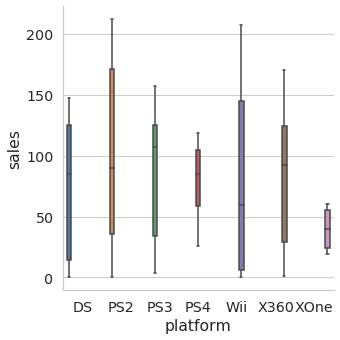

In [58]:
plt.figure(figsize=(20, 8))
sns.catplot(x = 'platform', y = 'sales', kind='box', hue='platform', data = df)

не знаю правильно я понял задание - построил ящики с усами по основным обсуждавшимся выше платформам: значения XOne относительно невелики - видимо платформа только растет. PS4 за недолгое время уже прибилзился к PS3. Думаю, что высокий разброс для PS2 обусловлен её доминирующей ролью в то время

<Figure size 1440x576 with 0 Axes>

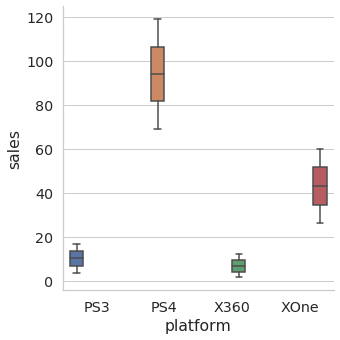

In [59]:
df = data.query('year_of_release >= 2015')
df = df.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'}) 
df = df.reset_index(level=['platform', 'year_of_release'])
df = df.query('platform in ("X360", "PS3", "PS4", "XOne")')

plt.figure(figsize=(20, 8))
sns.catplot(x = 'platform', y = 'sales', kind='box', hue='platform', data = df)

In [60]:
# выделение среза по актуальному периоду
data = data.query('year_of_release >= 2015')

## Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
Соотнести выводы с продажами игр на других платформах.

In [62]:
df = data.query('platform == "PS4"')

In [63]:
# рассчет корреляций
print('Корреляция продаж и оценок пользователей для PS4:', df['sales'].corr(df['user_score']))
print('Корреляция продаж и оценок критиков:', df['sales'].corr(df['critic_score']))

Корреляция продаж и оценок пользователей для PS4: -0.05973845712638215
Корреляция продаж и оценок критиков: 0.3928485555130601


Text(0.5, 1.0, 'Диаграмма рассеяния продаж от оценок критиков для PS4')

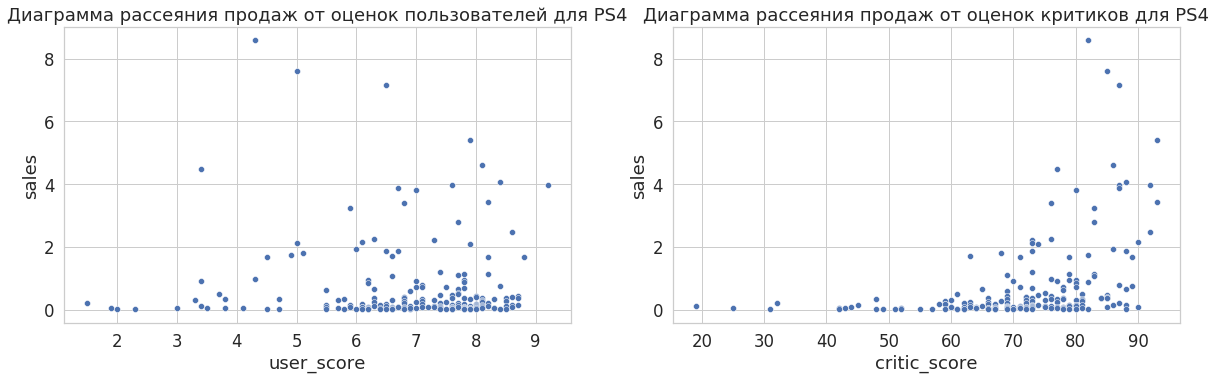

In [64]:
# диаграммы рассеяния

plt.figure(figsize=(20, 12))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1.5)

plt.subplot(2, 2, 1)
sns.scatterplot(data = df, x='user_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок пользователей для PS4')

plt.subplot(2, 2, 2)
sns.scatterplot(data = df, x='critic_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок критиков для PS4')

видно, что общие продажи заметно коррелируют с оценками критиков, с оценками пользователей корреляции нет

Корреляция продаж и оценок пользователей для всех данных: -0.0019642931122463344
Корреляция продаж и оценок пользователей для всех данных: 0.32552662253933334


Text(0.5, 1.0, 'Диаграмма рассеяния продаж от оценок критиков для всех данных')

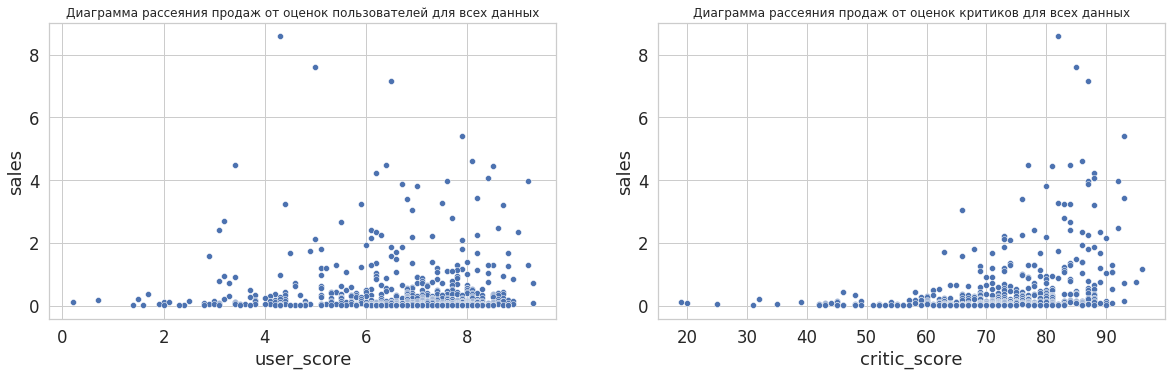

In [65]:
print('Корреляция продаж и оценок пользователей для всех данных:', data['sales'].corr(data['user_score']))
print('Корреляция продаж и оценок пользователей для всех данных:', data['sales'].corr(data['critic_score']))

plt.figure(figsize=(20, 12))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1.5)

plt.subplot(2, 2, 1)
sns.scatterplot(data = data, x='user_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок пользователей для всех данных', fontsize=12)

plt.subplot(2, 2, 2)
sns.scatterplot(data = data, x='critic_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок критиков для всех данных', fontsize=12)


если смотреть для всех данных, то продажи несколько меньше коррелируют с оценками критиков, с оценками пользователей корреляции нет 

посмотрю отдельно еще для XOne

Корреляция продаж и оценок пользователей для PS4: -0.04146733387366271
Корреляция продаж и оценок критиков: 0.430888745821368


Text(0.5, 1.0, 'Диаграмма рассеяния продаж от оценок критиков для XOne')

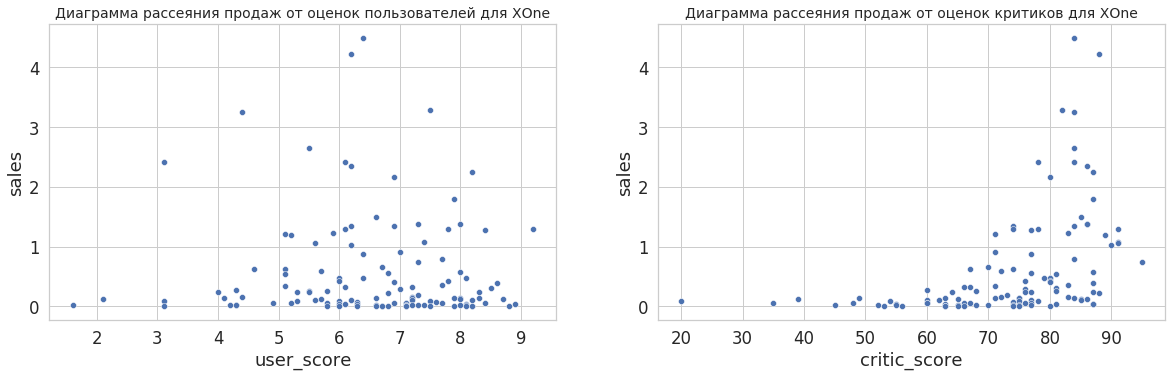

In [66]:
# этот пункт в основном закомментировал оставил только рассчет для XOne

df = data.query('platform == "XOne"')

# рассчет корреляций
print('Корреляция продаж и оценок пользователей для PS4:', df['sales'].corr(df['user_score']))
print('Корреляция продаж и оценок критиков:', df['sales'].corr(df['critic_score']))


# диаграммы рассеяния

plt.figure(figsize=(20, 12))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1.5)

plt.subplot(2, 2, 1)
sns.scatterplot(data = df, x='user_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок пользователей для XOne', fontsize=14)

plt.subplot(2, 2, 2)
sns.scatterplot(data = df, x='critic_score', y='sales')
plt.title('Диаграмма рассеяния продаж от оценок критиков для XOne', fontsize=14)


# аналогично посмотрю параметры еще для трех платформ X360 и двух, популярность которых растет XOne и PS4
#list_w = ['X360', 'PS4', 'XOne']
#for i in list_w:
#    df = data[data['platform'] == i]
#    print(i)
    
#    print('Корреляция продаж и оценок пользователей для', i, df['sales'].corr(df['user_score']))
#    print('Корреляция продаж и оценок критиков для', i, df['sales'].corr(df['critic_score']))
    
#    plt.figure(figsize=(20, 12))
#    sns.set(context = 'notebook', style = 'whitegrid', font_scale=1.5)

#    plt.subplot(2, 2, 1)
#    sns.scatterplot(data = df, x='user_score', y='sales')
#    plt.title('Диаграмма рассеяния продаж от оценок пользователей')  # у меня не получилось подставить переменную в название, потому ориентируюсь по порядку
    
#    plt.subplot(2, 2, 2)
#    sns.scatterplot(data = df, x='critic_score', y='sales')
#    plt.title('Диаграмма рассеяния продаж от оценок критиков')
    
#    plt.show

Для ХOne корреляция с оценками критиков чуть больше чем для PS4, c оценками пользователей также равна нулю

<a id='hist_2'></a>
## Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Гистограмма жанров')

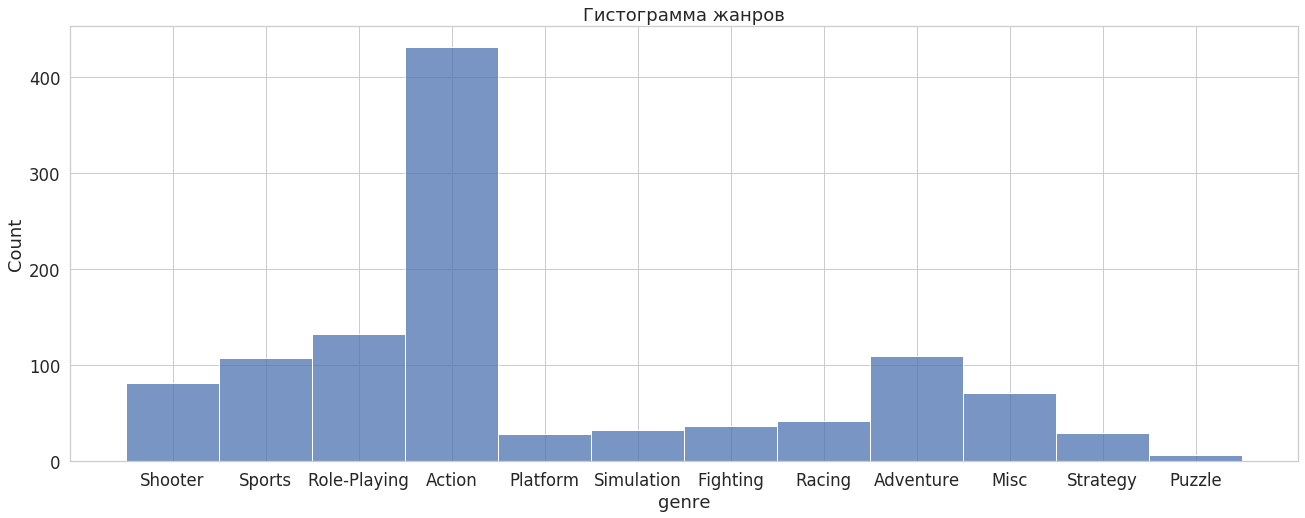

In [68]:
plt.figure(figsize=(22, 8))
sns.histplot(data=data, x="genre", bins=12)
plt.title('Гистограмма жанров')

видно, что самый распространенный жанр в актуальный период - Action

In [69]:
# теперь смотрю на прибыльность жанров (опираясь на медианную выручку)
df = data.groupby('genre')['sales'].median().sort_values(ascending=False)

In [70]:
display(df)

genre
Shooter         0.380
Sports          0.120
Role-Playing    0.115
Platform        0.100
Simulation      0.100
Fighting        0.090
Action          0.060
Misc            0.060
Racing          0.055
Strategy        0.050
Adventure       0.030
Puzzle          0.030
Name: sales, dtype: float64

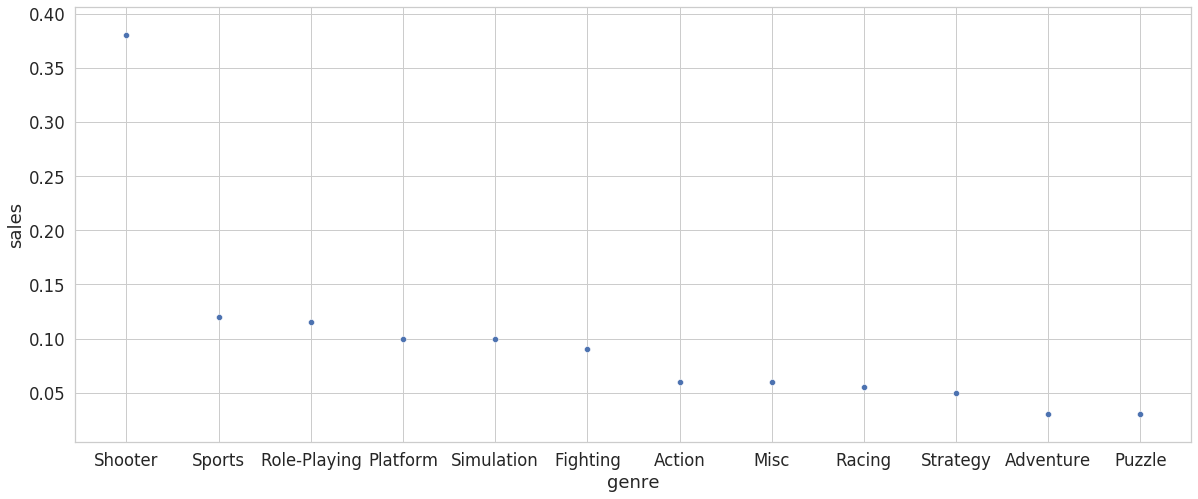

In [71]:
df = df.reset_index(level='genre')
plt.figure(figsize=(20, 8))
sns.scatterplot(data = df, x='genre', y='sales')

Выделяются самые прибыльный жанр: Shooter, вторым с заметным отставанием идет Sports. Самые малоприбыльные: Strategy, Adventure и Puzzle.
Прибыльность жанров и число игр идут не сходно. Action - самые распространенный жанрб а Shooter самый прибыльный. Strategy и Puzzle и малоприбыльны и малораспространенны. 

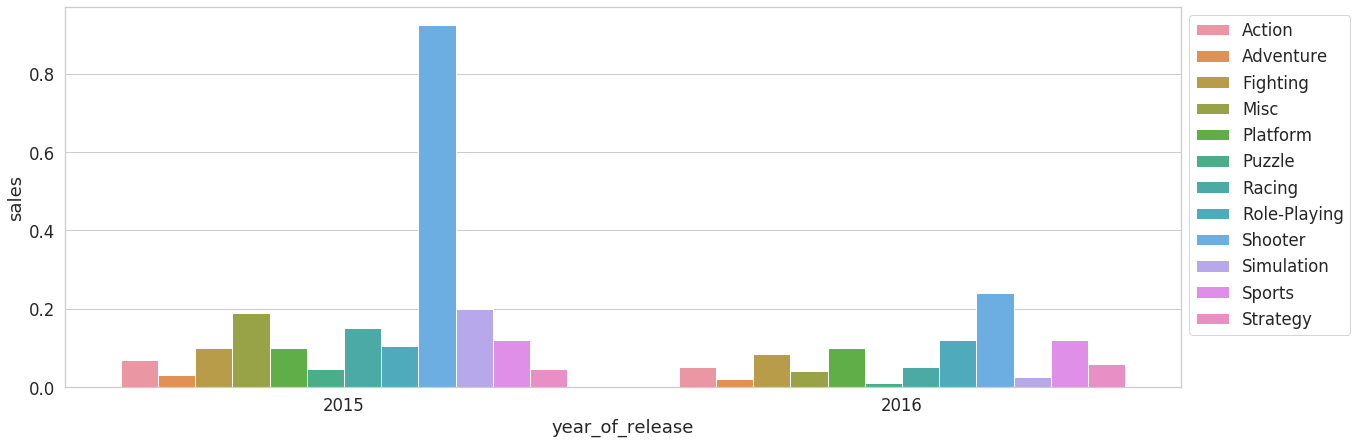

In [72]:
# посмотрю в графике
df = data.groupby(['genre', 'year_of_release']).agg({'sales': 'median'}) 
df = df.reset_index(level=['genre', 'year_of_release'])
#df = df.query('year_of_release > 2010')

plt.figure(figsize=(20, 7))
sns.barplot(x = 'year_of_release', y = 'sales', ci = None, hue='genre', data = df)
plt.legend(bbox_to_anchor = (1,1)) # сдвиг легенды

## Вывод по шагу 3

- До 1994-1996 годов игр был мало и и ндустрия была малоразвитой, нижней границей важного периода выбрал 1994.

- видно что динамика продаж для платформ идет в виде "волн", причем эти волны перекрываются (затухает одна - растет другая), "волна" (время от появления до исчезновения продаж на платформе) длится 9-11 лет. заметно, что с 2006 года лидирующих платформ стало больше и их "волны" болше накладываются друг на друга. также заметно, что 2006-2016 волны PS3 и X360 шли сходно.  

- могу предположить, что спад после 2009-2011 года может обусловлен исчензовением роли конкурентов PS и X - DS, Wii. Еще (это я когда-то слышал, а сейчас вспомнил) большую роль может иметь уровень развития смартфонов (что становится фактором некоторого спада в платформах). 

- **актуальный период - это 2015 и 2016 г.**

- наблюдается волна популярности платформ от подъема до спада лидирующей(или лидирующих) платформ, соответственно новая волна  начинается в 2013 году. У меня получалось, что период это 9-11 лет (с учетом того что периоды для PS3 и X360 11 лет - буду воспринимать эту цифру Пик наступает на 5-6 год - т.е. 2017 год должен быть началом пика периода (в 2016 данные не полны - поэтому он проседает)

- в период 2013-2016 виден последовательный спад: PS3, Wii, X360 и рост: PS4 и XOne **

- в 2015-2016 годах наблюдается преобладание PS4 и XOne над платформамми предыдущих поколений

- видно, что общие продажи заметно коррелируют с оценками критиков, и не коррелируюь с оценками пользователей, если смотреть для всех данных, то продажи меньше коррелируют с оценками критиков, и все также не коррелируют с оценками пользователей  

- Выделяются самые прибыльный жанр: Shooter, вторым с заметным отставанием идет Sports. Самые малоприбыльные: Strategy, Adventure и Puzzle. Прибыльность жанров и число игр идут не сходно. Action - самые распространенный жанрб а Shooter самый прибыльный. Strategy и Puzzle и малоприбыльны и малораспространенны. 

- сделана попытка прогноза продаж PS4 и XOne в 2017

<a id='step_4'></a>
# Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):  
•	Самые популярные платформы (топ-5). Описать различия в долях продаж.   
•	Самые популярные жанры (топ-5). Пояснить разницу.  
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Самые популярные платформы (топ-5). Описать различия в долях продаж

я не очень понял вопрос имеется в виду популярность по числу игр или по продажам (посмотрю оба варианта)

In [73]:
# для самых прибыльных
df = data.groupby('platform').agg({'sales': 'sum', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'}) 

In [74]:
df = df.sort_values(by='sales', ascending=False)
display(df)

,sales,na_sales,eu_sales,jp_sales,other_sales
platform,,,,,
PS4,188.15,63.86,83.54,12.05,28.70
XOne,86.29,50.30,28.10,0.18,7.71
3DS,42.92,10.31,7.39,23.55,1.67
WiiU,20.95,8.86,6.49,4.12,1.48
PS3,20.42,5.66,7.30,4.97,2.49
PC,13.77,3.72,9.10,0.00,0.95
X360,13.48,8.05,4.21,0.00,1.22
PSV,10.50,0.54,1.08,8.41,0.47
Wii,1.32,0.49,0.73,0.00,0.10


In [75]:
df = df.query('sales > 20') # я посмотрел сначала где граница 5 самых прибыльных

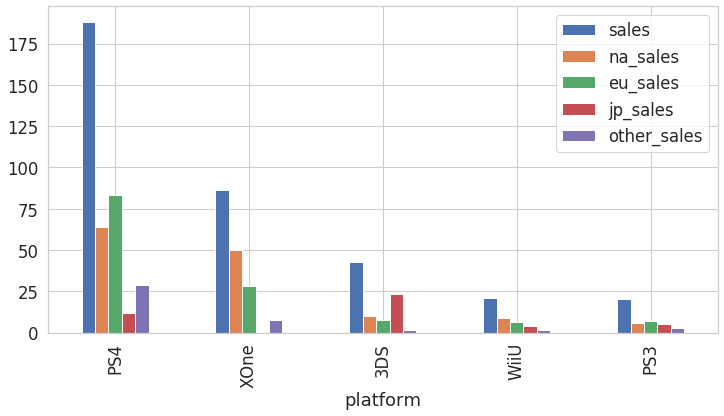

In [76]:
# в seaborn никак не мог построить, а так получилось
df.plot(kind ='bar', grid=True, figsize=(12, 6))

In [77]:
# то же для самых часто встречающихся

df = data.groupby('platform').agg({'sales': ['count', 'sum'], 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
df.columns = ['sales_count', 'sales_sum', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df = df.sort_values(by='sales_count', ascending=False)


In [78]:
df = df.sort_values(by='sales_count', ascending=False)
display(df)

,sales_count,sales_sum,na_sales,eu_sales,jp_sales,other_sales
platform,,,,,,
PS4,301,188.15,63.86,83.54,12.05,28.70
PSV,195,10.50,0.54,1.08,8.41,0.47
XOne,167,86.29,50.30,28.10,0.18,7.71
3DS,132,42.92,10.31,7.39,23.55,1.67
PS3,111,20.42,5.66,7.30,4.97,2.49
PC,104,13.77,3.72,9.10,0.00,0.95
X360,48,13.48,8.05,4.21,0.00,1.22
WiiU,42,20.95,8.86,6.49,4.12,1.48
Wii,5,1.32,0.49,0.73,0.00,0.10


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


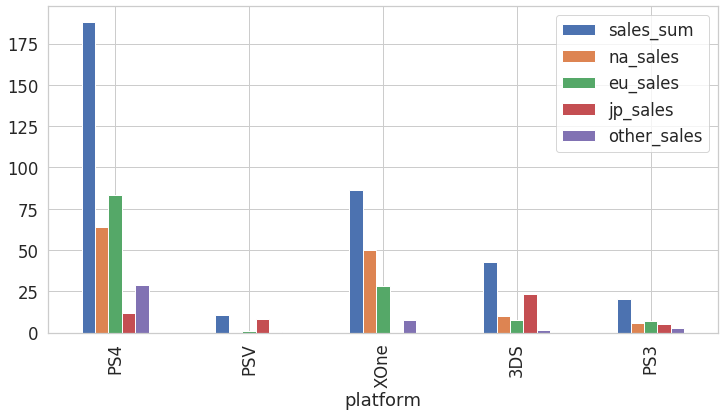

In [79]:
df = df.query('sales_count > 106') # я посмотрел сначала где граница 5 самых частых
df = df.drop('sales_count', 1)
df.plot(kind ='bar', grid=True, figsize=(12, 6))

на графиках проявляются заметные отличия:  
- по продажам: видно лидерство PS4 и XOne в Европе и Америке (в Европе преобладает PS4, в Америке XOne), при этом в Японии лидируют 3DS, а XOne в Японии вообще не заметна. В других страна (как и в Европе заметнее всего PS4). WiiU и PS3 видны везде, но то что они на спаде очень хорошо заметно
- по числу игр крупные тенденции те же. Отличие в том, что WiiU не попадает в пятерку вместо неё попадет Япония (почти целиком за счет PSV)

## Самые популярные жанры (топ-5). Пояснить разницу.

In [80]:
# аналогично предыдущему пункту рассмотрю ситуацию по жанрам
df = data.groupby('genre').agg({'sales': ['count', 'median'], 'na_sales': 'median', 'eu_sales': 'median', 'jp_sales': 'median', 'other_sales': 'median'})
df.columns = ['sales_count', 'sales_median', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df = df.sort_values(by='sales_count', ascending=False)

In [81]:
df

,sales_count,sales_median,na_sales,eu_sales,jp_sales,other_sales
genre,,,,,,
Action,431,0.060,0.000,0.010,0.01,0.00
Role-Playing,132,0.115,0.010,0.010,0.05,0.01
Adventure,110,0.030,0.000,0.000,0.01,0.00
Sports,107,0.120,0.040,0.050,0.00,0.01
Shooter,81,0.380,0.170,0.150,0.00,0.04
Misc,71,0.060,0.010,0.000,0.02,0.00
Racing,42,0.055,0.005,0.045,0.00,0.01
Fighting,37,0.090,0.030,0.030,0.03,0.01
Simulation,33,0.100,0.000,0.030,0.00,0.00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


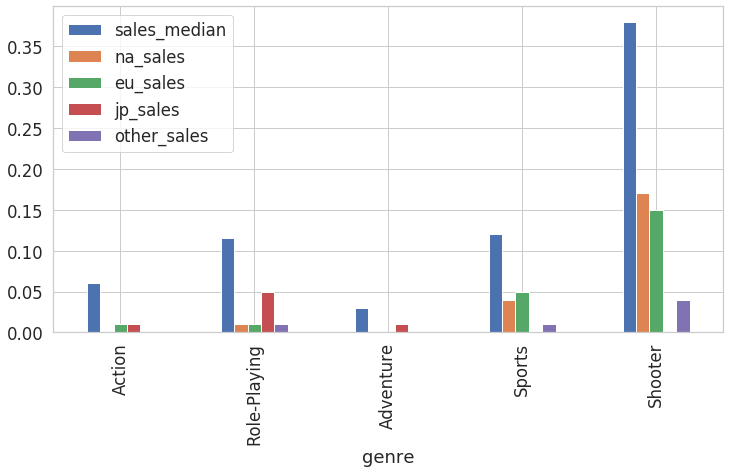

In [82]:
# посмотрю на графики (по самым популярным по числу и по продажам жанрам - как и в прошлый раз)
# максимальные 5 жанров по продажам
da = df.query('sales_count > 80')
da = da.drop('sales_count', 1)
da.plot(kind ='bar', grid=True, figsize=(12, 6))

In [83]:
display(df.sort_values(by='sales_median', ascending=False))

,sales_count,sales_median,na_sales,eu_sales,jp_sales,other_sales
genre,,,,,,
Shooter,81,0.380,0.170,0.150,0.00,0.04
Sports,107,0.120,0.040,0.050,0.00,0.01
Role-Playing,132,0.115,0.010,0.010,0.05,0.01
Simulation,33,0.100,0.000,0.030,0.00,0.00
Platform,28,0.100,0.050,0.040,0.00,0.01
Fighting,37,0.090,0.030,0.030,0.03,0.01
Action,431,0.060,0.000,0.010,0.01,0.00
Misc,71,0.060,0.010,0.000,0.02,0.00
Racing,42,0.055,0.005,0.045,0.00,0.01


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


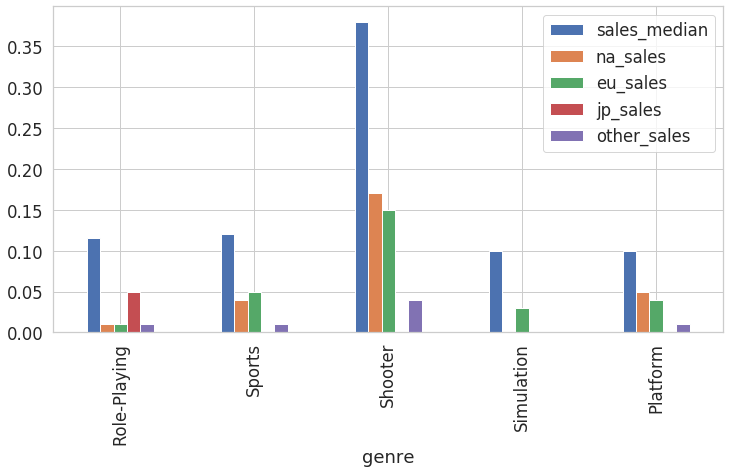

In [84]:
# максимальные 5 жанров по числу игр

da = df.query('sales_median > 0.095')
da = da.drop('sales_count', 1)
da.plot(kind ='bar', grid=True, figsize=(12, 6))

на графиках проявляются заметные отличия:  
- по медианным продажам: видно лидерство Шутеров в Европе и Америке на втором месте Sports (в Америке больше доля Шутеров, в Европе - Sports). В других странах, тоже заметнее всего шутеры. Японский рынок заметно отличается - там вообще не заметны Shooter и Sports и лидирует Role-Playing
- по числу игр крупные тенденции те же. Правда показатели Sports почти сходны с показателями Platform (я думал их сейчас почти нет) 

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [85]:
# сиотрю какие значения рейтинга существуют для актуального периода
data['rating'].value_counts()

T       192
E       153
M       149
E10+    101
Name: rating, dtype: int64

In [86]:
#смотрю число пропусков
print(data['rating'].isna().sum())

513


In [87]:
data ['rating'] = data['rating'].fillna('nd')
print(data['rating'].isna().sum())

0


In [88]:
# здесь планирую применить аналогичный подход тем что были выше (наверное здесь пока логично оставить сумму)
df = data.groupby('rating').agg({'sales': ['count', 'sum'], 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
df.columns = ['sales_count', 'sales_sum', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df = df.sort_values(by='sales_sum', ascending=False)
display(df)

,sales_count,sales_sum,na_sales,eu_sales,jp_sales,other_sales
rating,,,,,,
nd,513,117.17,37.44,35.71,32.89,11.13
M,149,111.10,47.03,45.54,4.29,14.24
E,153,75.24,26.59,34.83,5.25,8.57
T,192,57.73,22.86,20.32,7.70,6.85
E10+,101,36.68,17.87,11.54,3.27,4.00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


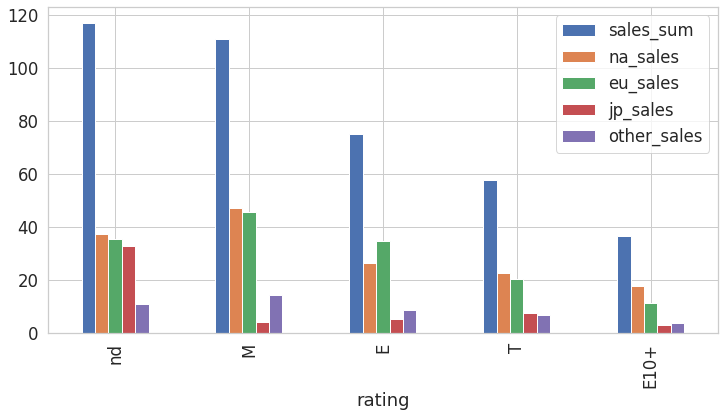

In [89]:
# редкие рейтинги на общую картину не повлияют (их можно было бы заменять на более частые, но с учетом их редкости думаю, что это безсмысленно)
# в данном варианте их нет пропуски заменил на значение "nd"
da = df.query('rating in ("E", "T", "M", "E10+", "nd")')
da = da.drop('sales_count', 1)
da.plot(kind ='bar', grid=True, figsize=(12, 6))

Самые высокие продажи наблюдаются для M, самые низкие для E10+. Также высокие продажи видны для игр без рейтинга (и здесь видно отличие Японии - там продажи игр без рейтинга высоки, тогда как с различными рейтингами низки

## Вывод по шагу 4
- Видно, что для PS2, DS, Wii и X360 соотношение показателей Европы, Америки и других - сходное. Для PS2 есть неоторое отличие в том что продажи по Европе относительно высоки (почти достигают уровня Америки). Сильнее всего отличаются японские продажи - там относительно низка роль X360, зато самая высокая доль продаж для DS.

- данные по числу игр жанра и по продажам сходные (правда по числу один из 5ки лидеров это Platform, а по продажам Misc. в остальном видно то же соотношение Америки (больше), Европы (средне) и Других и отличающаяся Япония (резко понижение в Шутерах) и росто в Ролевых играх (даже опережающий Америку)

- Во всех регионах самые низкие продажи у Е10+, а самые высокие у Е. Продажи для Т и М примерно одинаковые, но тут как и раньше отличается Япония - для М ниже, чем для Т

<a id='step_5'></a>
## Шаг 5. Проверить гипотезы

• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
• Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



Пояснить:
• Как сформулировали нулевую и альтернативную гипотезы;
• Какой критерий применили для проверки гипотез и почему.

## Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В выборе метода для провреки этой следующей гипотезы важно понять являются ли выборки по пользовательским рейтингам зависимыми совокупностями или нет - мне кажется, что нет (могу ошибаться), т.к., несмотря на то что они объединяются в один набор данных, рейтинги XOne и PC в нем не связаны (т.е. не рассматривается действия с одним тарифом, которые повлияют по условиям задания на другой). Так же думаю и в плане жанров.  
Для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам решил применить метод  **scipy.stats.ttest_ind**

В случае если выборки по рейтингам - являются зависимыми совокупностями стоит использовать метод **scipy.stats.ttest_rel**
(конечно возможно, что рост одной платформы(жанра) связан со снижением другой, но их много и по моему зависимость между платформами и жанрами не видна)

Нулевая гипотеза будет звучать: пользовательские рейтинги платформ Xbox One и PC - не отличаются  
Альтернатиная гипотеза: пользовательские рейтинги платформ Xbox One и PC - будут отличаться

In [90]:
xone_score = data.query('platform == "XOne"')['user_score'] # выделяю столбцы с рейтингами
pc_score = data.query('platform == "PC"')['user_score']

xone_score = xone_score.dropna() # уберу пропуски
pc_score = pc_score.dropna()

#xone_score_sample = xone_score.sample(180)  # из всего набора данных возьму 180 случайных значений
#pc_score_sample = pc_score.sample(180)

In [92]:
alpha = .05   # критический уровень значимости задал равным 0.5 (т.к. так обычно делают)

results = st.ttest_ind(
    xone_score, 
    pc_score)


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - значит пользовательские рейтинги платформ Xbox One и PC - отличаются')
else:
    print('Не отвергаем нулевую гипотезу - значит пользовательские рейтинги платформ Xbox One и PC - не отличаются') 


p-значение:  0.2778542084733835
Не отвергаем нулевую гипотезу - значит пользовательские рейтинги платформ Xbox One и PC - не отличаются


## Проверка гипотезы: пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза будет звучать: пользовательские рейтинги жанров Action и Sports - не отличаются  
Альтернатиная гипотеза: пользовательские рейтинги рейтинги жанров Action и Sports - будут отличаться

In [93]:
action_score = data.query('genre == "Action"')['user_score'] # выделяю столбцы с рейтингами
sports_score = data.query('genre == "Sports"')['user_score']

action_score = action_score.dropna() # уберу пропуски
sports_score = sports_score.dropna()

#action_score_sample = action_score.sample(180)  # из всего набора данных возьму 180 случайных значений
#sports_score_sample = sports_score.sample(180)

In [95]:
alpha = .05   # критический уровень значимости задал равным 0.5 (т.к. так обычно делают)

results = st.ttest_ind(
    action_score, 
    sports_score)


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - значит пользовательские рейтинги жанров Action и Sports - отличаются')
else:
    print('Не отвергаем нулевую гипотезу - значит пользовательские рейтинги жанров Action и Sports - не отличаются') 

p-значение:  1.0012846807938657e-13
Отвергаем нулевую гипотезу - значит пользовательские рейтинги жанров Action и Sports - отличаются


## Вывод по шагу 5
Гипотеза в задании - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не подтверждена, рейтинги отличаются
Гипотеза в задании - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - не подтверждена - рейтинги не отличаются.

<a id='step_6'></a>
## Шаг 6. Общий вывод

- До 1994-1996 годов игр был мало и и ндустрия была малоразвитой, нижней границей важного периода выбрал 1994.

- видно что динамика продаж для платформ идет в виде "волн", причем эти волны перекрываются (затухает одна - растет другая), "волна" (время от появления до исчезновения продаж на платформе) длится 9-11 лет. заметно, что с 2006 года лидирующих платформ стало больше и их "волны" болше накладываются друг на друга. также заметно, что 2006-2016 волны PS3 и X360 шли сходно.  

- **актуальный период - это 2015 и 2016 г.**

- в период 2013-2016 виден последовательный спад: PS3, Wii, X360 и рост: PS4 и XOne

- в 2015-2016 годах наблюдается преобладание PS4 и XOne над платформамми предыдущих поколений

- видно, что общие продажи заметно коррелируют с оценками критиков, и не коррелируют с оценками пользователей, если смотреть для всех данных, то продажи меньше коррелируют с оценками критиков, и все также не коррелируют с оценками пользователей  

- Выделяются самые прибыльный жанр: Shooter, вторым с заметным отставанием идет Sports. Самые малоприбыльные: Strategy, Adventure и Puzzle. Прибыльность жанров и число игр идут не сходно. Action - самые распространенный жанр, а Shooter самый прибыльный. Strategy и Puzzle и малоприбыльны и малораспространенны.

- сделана попытка прогноза продаж PS4 и XOne в 2017

- по медианным продажам: видно лидерство Шутеров в Европе и Америке на втором месте Sports (в Америке больше доля Шутеров, в Европе - Sports). В других странах, тоже заметнее всего шутеры. Японский рынок заметно отличается - там вообще не заметны Shooter и Sports и лидирует Role-Playing

- Самые высокие продажи наблюдаются для M, самые низкие для E10+. Также высокие продажи видны для игр без рейтинга (и здесь видно отличие Японии - там продажи игр без рейтинга высоки, тогда как с различными рейтингами низки

- Гипотеза в задании - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не подтверждена, рейтинги отличаются

- Гипотеза в задании - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - не подтверждена - рейтинги не отличаются.

